In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Loading the dataset
data=pd.read_csv("advertising.csv")

In [38]:
# loading the top five records
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [39]:
# loading the bottom five records
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [40]:
# displaying the size of dataset
data.size

800

In [41]:
# Repesentation the number of dimensions
data.ndim

2

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [44]:
data.shape

(200, 4)

In [45]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [46]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [85]:
data.isnull().sum

<bound method DataFrame.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>

In [47]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [48]:
X=data.iloc[:,1:14]
X

,Radio,Newspaper,Sales
0,37.8,69.2,22.1
1,39.3,45.1,10.4
2,45.9,69.3,12.0
3,41.3,58.5,16.5
4,10.8,58.4,17.9
...,...,...,...
195,3.7,13.8,7.6
196,4.9,8.1,14.0
197,9.3,6.4,14.8
198,42.0,66.2,25.5


In [49]:
Y=data.iloc[:,-1]
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [50]:
# visualizing the dataset using differnet types of graph for better understanding

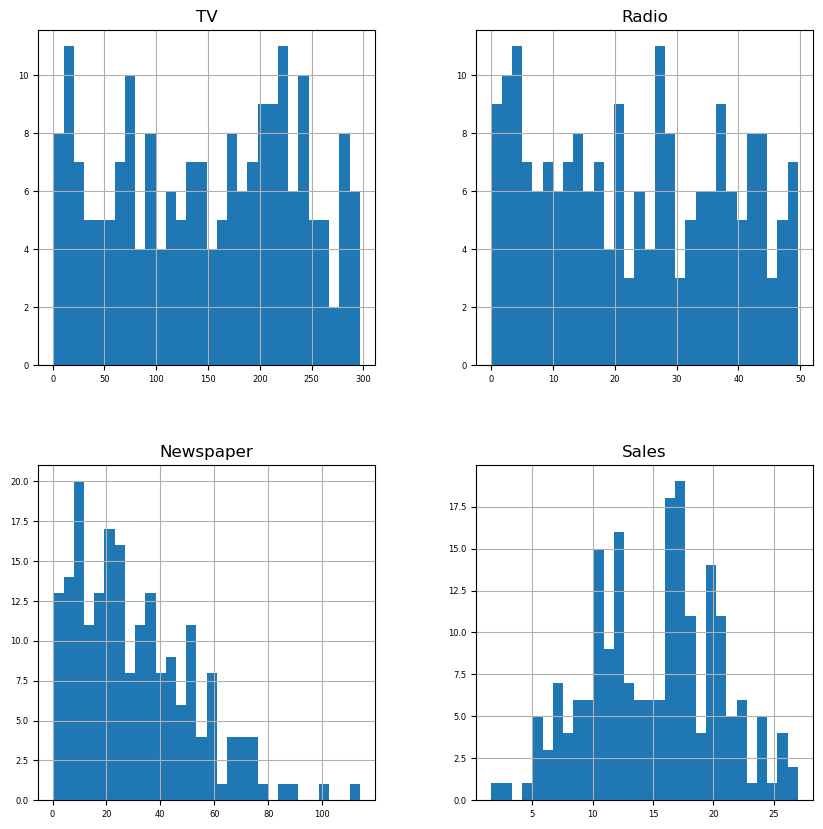

In [51]:
data.hist(figsize=(10, 10), bins=30, xlabelsize=6, ylabelsize=6);

<Axes: ylabel='Frequency'>

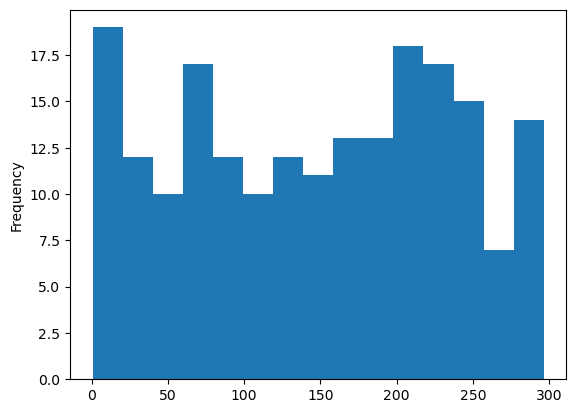

In [83]:
data['TV'].plot.hist(bins=15)

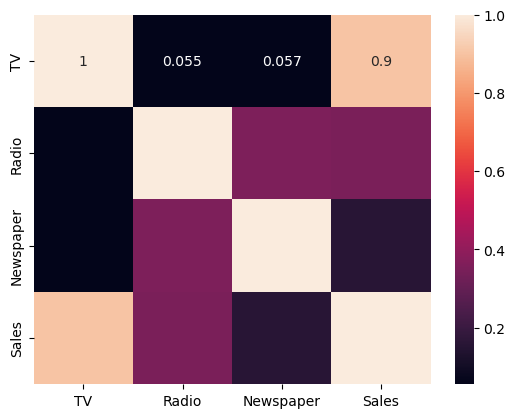

In [84]:
sns.heatmap(data.corr(),annot=True)
plt.show()

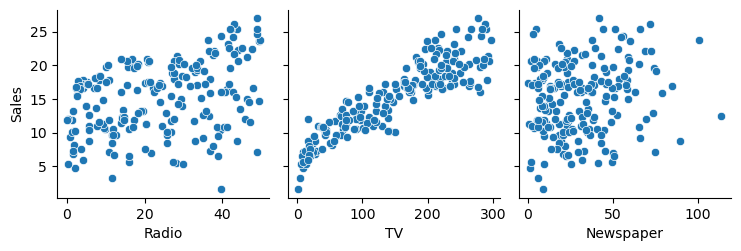

In [53]:
sns.pairplot(data, x_vars=['Radio','TV', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

<Axes: ylabel='count'>

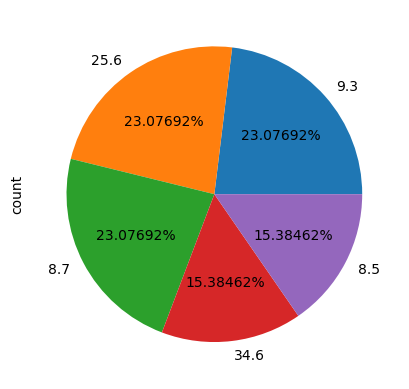

In [55]:
data['Newspaper'].value_counts().head().plot(kind = 'pie',autopct = '%5.5f%%')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

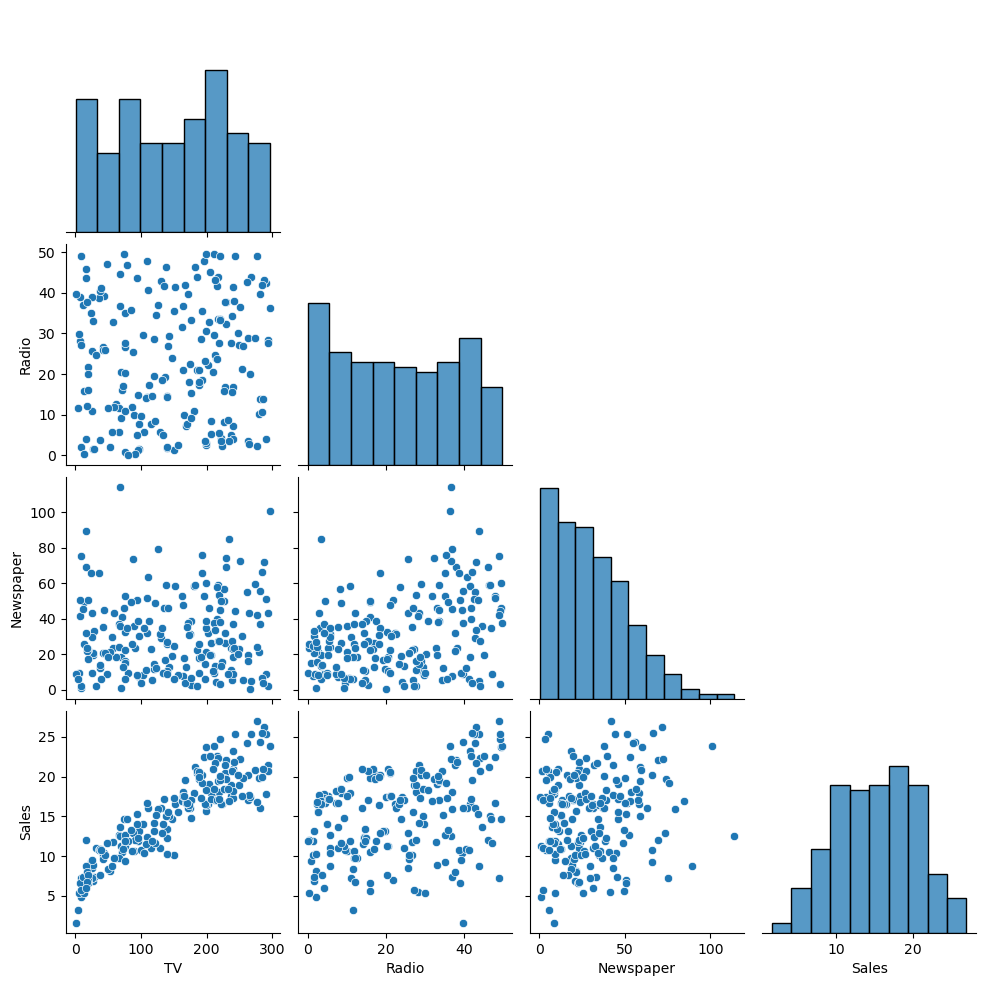

In [54]:
sns.pairplot(data, corner=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_2888\1851847670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

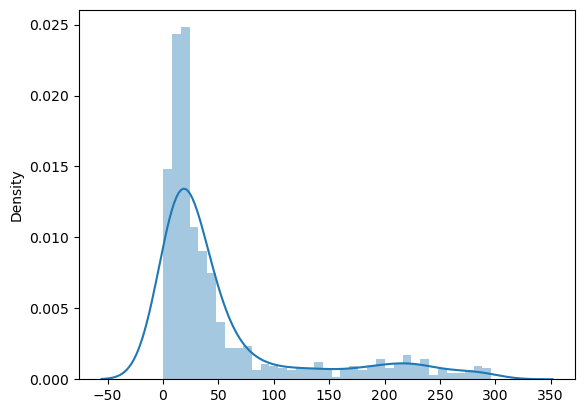

In [56]:
sns.distplot(data)

In [57]:
# standardscalar()-This function is used to standardize the data values into a standard format...

In [58]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
data['Sales']=Sc.fit_transform(pd.DataFrame(data['Sales']))

In [59]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,1.322319
1,44.5,39.3,45.1,-0.897515
2,17.2,45.9,69.3,-0.593948
3,151.5,41.3,58.5,0.259834
4,180.8,10.8,58.4,0.525455


In [60]:
data.shape

(200, 4)

In [61]:
# checking whether duplicate values are present
data.duplicated().any()

False

In [62]:
# creating a logistic regression
# modelling

from sklearn.model_selection import train_test_split

In [63]:
# splitting the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(80, 3)
(120,)
(80,)


In [64]:
X_train

,Radio,Newspaper,Sales
12,35.1,65.9,9.2
16,36.6,114.0,12.5
101,36.3,100.9,23.8
120,26.8,46.2,15.5
45,22.5,31.5,16.1
...,...,...,...
87,40.6,63.2,16.0
103,17.2,17.9,19.7
67,14.5,10.2,13.4
24,12.6,18.3,9.7


In [65]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
       ... 
146    18.2
199    18.4
10     12.6
20     18.0
165    16.9
Name: Sales, Length: 80, dtype: float64

In [66]:
X_train=X_train.astype(int)
X_test=X_test.astype(int)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [67]:
#linear regression

from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [68]:
Lr.fit(X_train,y_train)

LinearRegression()

In [69]:
y_predic=Lr.predict(X_test)

In [70]:
y_predic

array([ 6., 20., 17., 19., 21., 17., 12., 16., 22., 22., 11., 19.,  8.,
       20., 10., 14., 17., 16., 18., 11., 17., 11., 22., 17., 20., 24.,
       19., 11., 20., 15., 13., 11., 11., 19.,  8., 14., 13., 16., 16.,
       20., 17., 17., 17., 17., 13., 10.,  8., 18., 10.,  7., 16., 16.,
       12., 16., 18., 10.,  5.,  9., 16., 13., 17., 16., 22., 15., 14.,
       11., 17., 12.,  6., 18., 13.,  8., 10., 16., 16., 18., 18., 12.,
       18., 16.])

In [71]:
y_test

126     6
104    20
99     17
92     19
111    21
       ..
146    18
199    18
10     12
20     18
165    16
Name: Sales, Length: 80, dtype: int32

In [72]:
# checking the performance of regression model......

In [79]:
# MEAN SQUARED ERROR (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test , y_predic)
mse

2.5637979419682884e-30

In [80]:
# MEAN ABSOLUTE ERROR (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test , y_predic)
mae

9.325873406851315e-16

In [81]:
# ROOT MEAN SQUARED ERROR (RMSE) 
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predic)
r2

1.0

In [76]:
# machice learing classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
l=knn_clf.predict(X_train[10:20])
print(l)

[ 3 21 22 14  8 20 16 17  9 17]


In [78]:
l=knn_clf.score(X_test,y_test)
print(l)

0.05
